# Computational physics P452 endsem

### Chandan Kumar Sahu
### Roll No. 1911055

In [1]:
import math
import matplotlib.pyplot as plt
from Chandan_Library_Endsem import *
import warnings
warnings.filterwarnings("ignore")


# Question 1


# Mine


Lifetime of the species: 96.36253898605258
Error in lifetime: 12.185024789735728

Degrees of freedom: 9
Chi square: 17.891415256354072
The fit is not acceptable at 95% level of significance.


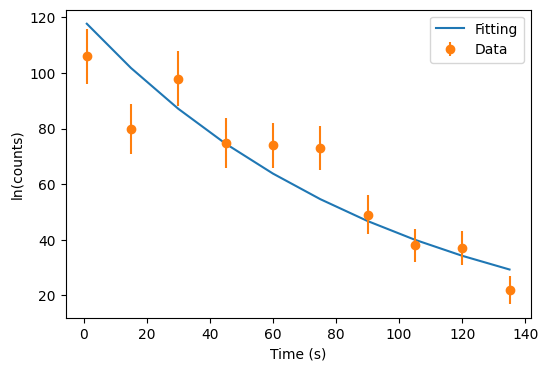

In [2]:

def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

def Line_fit(X, Y):
    n = len(X) # or len(Y)
    xbar = sum(X)/n
    ybar = sum(Y)/n

    # Calculating numerator and denominator
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    # calculation of slope and intercept
    m = numer / denum
    c = ybar - m * xbar
    
    # Calculation of error in the slope
    std_dev_residuals = np.sqrt(sum(( Y - (c + m*X) )**2) / (n - 2))
    std_dev_x = np.sqrt(sum([(xi - xbar)**2 for xi in X]) / (n - 1))
    slope_error = std_dev_residuals / (std_dev_x * np.sqrt(n))
    
    return c, m, slope_error

def calculate_expected_frequencies(x, y):
    log_y = np.log(y)
    intercept, slope, error = Line_fit(x, log_y)
    expected_frequencies = np.exp(intercept + slope * x)
    return expected_frequencies

def calculate_chi_square(x, observed, std_dev):
    expected = calculate_expected_frequencies(x, observed)
    chi_square = np.sum(((observed - expected) / std_dev)**2)
    df = len(observed) - 1  # degrees of freedom
    return chi_square, df

x, observed, std_dev = np.genfromtxt('endsemfit.txt', unpack=True)
chi_square, degrees_of_freedom = calculate_chi_square(x, observed, std_dev)

def calculate_lifetime_and_error(slope, slope_error):
    decay_constant = -slope
    lifetime = 1 / decay_constant
    lifetime_error = slope_error / (decay_constant ** 2)
    return lifetime, lifetime_error

print()

log_observed = np.log(observed)
intercept, slope, error = Line_fit(x, log_observed)
lifetime, lifetime_error = calculate_lifetime_and_error(slope, error)
print("Lifetime of the species:", lifetime)
print("Error in lifetime:", lifetime_error)

print()

print("Degrees of freedom:", degrees_of_freedom)
print('Chi square:', chi_square)
critical_chi_square = 16.919

# Determine if fit is acceptable at 95% level of significance
if chi_square < critical_chi_square:
    print("The fit is acceptable at 95% level of significance.")
else:
    print("The fit is not acceptable at 95% level of significance.")

# Plot the data and the fit
expected = calculate_expected_frequencies(x, observed)

plt.figure(figsize=(6, 4))
plt.plot(x, expected, label='Fitting')
plt.errorbar(x, observed, yerr=std_dev, fmt='o', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('ln(counts)')
plt.legend()
plt.show()


# Question 2


In [3]:
# Define the function g(x), this has to be input by the user
def g1(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return R*T/(p+(a/(V**2))) + b

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(g1, initial_guess, eps)

print(f"Root of the given equation: {ROUND(root, 5)}")
print(f"Number of iterations performed: {Num_iter}")
print()

# Define the function g(x), this has to be input by the user
def g2(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return math.sqrt(a/(R*T/(V-b) - p))

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(g2, initial_guess, eps)

print(f"Root of the given equation: {ROUND(root, 5)}")
print(f"Number of iterations performed: {Num_iter}")


Root of the given equation: 3.92995
Number of iterations performed: 10

Root of the given equation: 0.18566
Number of iterations performed: 36


# Question 3
Done in answer sheet


# Question 4
Done in answer sheet

# Question 5



In [4]:
matrix = np.loadtxt('endsemmat.txt')

print("Matrix:")
print(matrix)
print()

# Get the first two largest eigenvalues and their corresponding eigenvectors
eigenvalues = []
eigenvectors = []
matrix_n = matrix
for _ in range(2):
    eigenvalue, eigenvector = power_method_AR(matrix_n, 1000)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    # Deflate the matrix
    matrix_n = matrix_n - eigenvalue * np.outer(eigenvector, eigenvector)

# Constants
a = c = -1
b = 2
n = 5

# Calculate expected eigenvalues and eigenvectors
expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

# Normalizing 
expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]


print("Comparison with expected values:\n")
# Print the expected and computed eigenvalues and eigenvectors
for i in range(2):
	print(f"Expected eigenvalue {i+1}: {np.round(expected_eigenvalues[i],6)}")
	print(f"Computed eigenvalue {i+1}: {np.round(eigenvalues[i],6)}")
	print()
	print(f"Expected eigenvector {i+1}: {np.round(expected_eigenvectors[i],6)}")
	print(f"Computed eigenvector {i+1}: {np.round(eigenvectors[i],6)}")
	print()

Matrix:
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Comparison with expected values:

Expected eigenvalue 1: 3.732051
Computed eigenvalue 1: 3.732051

Expected eigenvector 1: [0.288675 0.5      0.57735  0.5      0.288675]
Computed eigenvector 1: [-0.288675  0.5      -0.57735   0.5      -0.288675]

Expected eigenvalue 2: 3.0
Computed eigenvalue 2: 3.0

Expected eigenvector 2: [ 0.5  0.5  0.  -0.5 -0.5]
Computed eigenvector 2: [ 0.5 -0.5  0.   0.5 -0.5]



# Question 6

Probability of getting success: 0.48422398264541244


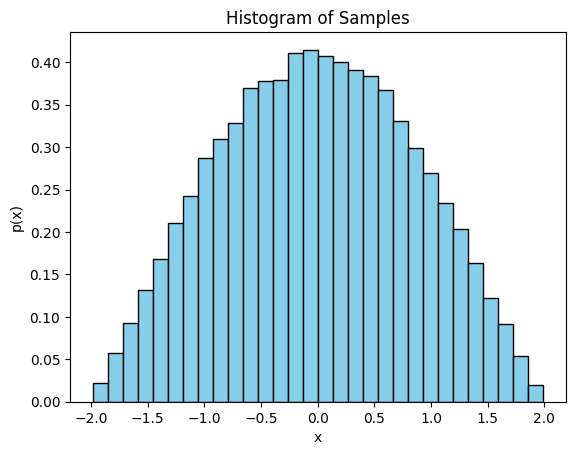

In [5]:
a = 2
N = 100000

# Target distribution
def p(x):
	return 0.5 * (a**2 - x**2) if abs(x) < a else 0

# Generate samples
samples = []
num_rejected = 0
while len(samples) < N:
	# sample from Gaussian distribution
	x = np.random.normal(0, a)  
	# uniform random number
	u = np.random.uniform(0, 0.5 * a**2)
	if u < p(x):
		samples.append(x)
	else:
		num_rejected += 1

# Print success probability
print(f"Probability of getting success: {N / (N + num_rejected)}")

# Plot histogram of samples
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of Samples')
plt.show()


# Question 7


Expectation value of Hamiltonian: 

a = 0.1: E = 2.55069228876626
a = 0.2: E = 1.347919491987395
a = 0.3: E = 0.7385381926044581
a = 0.4: E = 0.6261490206797669
a = 0.5: E = 0.49490597413492615
a = 0.6: E = 0.4271283686733075
a = 0.7: E = 0.3838315942770528
a = 0.7999999999999999: E = 0.30668046716894587
a = 0.8999999999999999: E = 0.2819553610787634
a = 0.9999999999999999: E = 0.27625363129415903
a = 1.0999999999999999: E = 0.20901600487575278
a = 1.2: E = 0.20219033921725774
a = 1.3: E = 0.1838629960135568
a = 1.4: E = 0.21262283333959645
a = 1.5: E = 0.17148072579621618
a = 1.5999999999999999: E = 0.14760064849928808
a = 1.7: E = 0.1904860822457878
a = 1.8: E = 0.10607337133579017
a = 1.9: E = 0.10283494004631971
a = 2.0: E = 0.16386785932762865


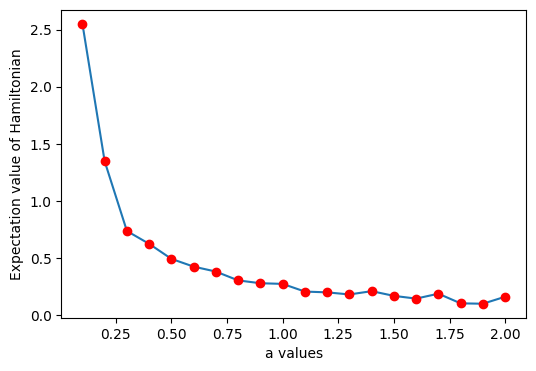

In [6]:
m = 1  # mass
omega = 1  # frequency
N = 20000  # number of Monte Carlo steps
a_values = np.linspace(0.1, 2.0, 20)  # variational parameters

# Trial wavefunction and its derivative
def psi_trial(x, a):
    return np.exp(-a * x**2)

def psi_trial_prime(x, a):
    return -2 * a * x * np.exp(-a * x**2)

# Hamiltonian
def Hamiltonian(x, a):
    kinetic_energy = -0.5 * psi_trial_prime(x, a) / psi_trial(x, a)
    potential_energy = 0.5 * m * omega**2 * x**2
    return kinetic_energy + potential_energy

# Monte Carlo step
def MC_step(x, delta=1.0):
    return x + delta * (2 * np.random.rand() - 1)

x = 0.0 	# Initialize position

E_a = []
# Perform Monte Carlo simulation for each variational parameter
for a in a_values:
    total_energy = 0.0
    for i in range(N):
        x_new = MC_step(x)
        if np.random.rand() < psi_trial(x_new, a) / psi_trial(x, a):
            x = x_new
        total_energy += Hamiltonian(x, a)

    # Calculate expectation value of Hamiltonian
    expectation_energy = total_energy / N
    E_a.append(expectation_energy)

print('Expectation value of Hamiltonian: \n')
for i in range(len(a_values)):
    print(f"a = {a_values[i]}: E = {E_a[i]}")

# Plot E_a vs a
plt.figure(figsize=(6, 4))
plt.plot(a_values, E_a)
plt.plot(a_values, E_a, 'ro')
plt.xlabel('a values')
plt.ylabel('Expectation value of Hamiltonian')
plt.show()
